In [1]:
# pip install seaborn

In [2]:
import pandas as pd
import numpy as np
import time
import re
from sklearn.impute import SimpleImputer
from sklearn.datasets import load_iris
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("new_unicorn_data_updated.csv")

In [4]:
df.head()

,Company,Date Joined,Industry,Country,City,Continent,Year Founded,Funding,Funding_Numeric ($B),Valuation (March) ($B),Select Investors (March),Valuation (November) ($B),Select Investors (November),Years to Unicorn,Most Recent Valuation
0,SpaceX,2012-12-01,Other,United States,Hawthorne,North America,2002,$7B,7.000,100,"Founders Fund, Draper Fisher Jurvetson, Rothen...",127.0,"Founders Fund, Draper Fisher Jurvetson, Rothen...",10,127.0
1,SHEIN,2018-07-03,E-commerce And Direct-to-consumer,China,Shenzhen,Asia,2008,$2B,2.000,100,"Tiger Global Management, Sequoia Capital China...",100.0,"Tiger Global Management, Sequoia Capital China...",10,100.0
2,Stripe,2014-01-23,Fintech,United States,San Francisco,North America,2010,$2B,2.000,95,"Khosla Ventures, LowercaseCapital, capitalG",95.0,"Khosla Ventures, LowercaseCapital, capitalG",4,95.0
3,Klarna,2011-12-12,Fintech,Sweden,Stockholm,Europe,2005,$4B,4.000,46,"Institutional Venture Partners, Sequoia Capita...",6.7,"Institutional Venture Partners, Sequoia Capita...",6,6.7
4,Canva,2018-01-08,Internet Software And Services,Australia,Surry Hills,Oceania,2012,$572M,0.572,40,"Sequoia Capital China, Blackbird Ventures, Mat...",40.0,"Sequoia Capital China, Blackbird Ventures, Mat...",6,40.0


In [5]:
# df[df["Company"] == "ByteDance"]

In [4]:
df['Industry']

0                                   Other
1       E-commerce And Direct-to-consumer
2                                 Fintech
3                                 Fintech
4          Internet Software And Services
                      ...                
1034    E-commerce And Direct-to-consumer
1035    E-commerce And Direct-to-consumer
1036                  Consumer And Retail
1037                              Fintech
1038    E-commerce And Direct-to-consumer
Name: Industry, Length: 1039, dtype: object

In [5]:
# Encode 'Industry'
industry_le = LabelEncoder()
df['Encoded_Industry'] = industry_le.fit_transform(df['Industry'])

# Encode 'Country'
country_le = LabelEncoder()
df['Encoded_Country'] = country_le.fit_transform(df['Country'])

# Print the mapping dictionaries for 'Industry' and 'Country'
industry_mapping_dict = dict(zip(df['Encoded_Industry'].unique(), industry_le.inverse_transform(df['Encoded_Industry'].unique())))
sorted_industry_mapping_dict = sorted(industry_mapping_dict.items(), key=lambda x: x[0])

country_mapping_dict = dict(zip(df['Encoded_Country'].unique(), country_le.inverse_transform(df['Encoded_Country'].unique())))
sorted_country_mapping_dict = sorted(country_mapping_dict.items(), key=lambda x: x[0])

print("Encoded_Industry Mapping:")
for key, value in sorted_industry_mapping_dict:
    print(f"{key} = {value}")

print("\nEncoded_Country Mapping:")
for key, value in sorted_country_mapping_dict:
    print(f"{key} = {value}")

Encoded_Industry Mapping:
0 = Artificial Intelligence
1 = Auto And Transportation
2 = Consumer And Retail
3 = Cybersecurity
4 = Data Management And Analytics
5 = E-commerce And Direct-to-consumer
6 = Edtech
7 = Fintech
8 = Hardware
9 = Health
10 = Internet Software And Services
11 = Mobile And Telecommunications
12 = Other
13 = Supply Chain, Logistics, And Delivery
14 = Travel

Encoded_Country Mapping:
0 = Argentina
1 = Australia
2 = Austria
3 = Bahamas
4 = Belgium
5 = Bermuda
6 = Brazil
7 = Canada
8 = Chile
9 = China
10 = Colombia
11 = Croatia
12 = Denmark
13 = Estonia
14 = Finland
15 = France
16 = Germany
17 = Hong Kong
18 = India
19 = Indonesia
20 = Ireland
21 = Israel
22 = Italy
23 = Japan
24 = Lithuania
25 = Luxembourg
26 = Malaysia
27 = Mexico
28 = Netherlands
29 = Nigeria
30 = Norway
31 = Philippines
32 = Senegal
33 = Singapore
34 = South Africa
35 = South Korea
36 = Spain
37 = Sweden
38 = Switzerland
39 = Thailand
40 = Turkey
41 = United Arab Emirates
42 = United Kingdom
43 = U

In [6]:
# CompanyAge
df["CompanyAge"] = 2023 - df["Year Founded"]

In [7]:
features = ['Encoded_Industry', 'Encoded_Country', 'CompanyAge', 'Funding_Numeric ($B)']
X = df[features]
X

,Encoded_Industry,Encoded_Country,CompanyAge,Funding_Numeric ($B)
0,12,43,21,7.000
1,5,9,15,2.000
2,7,43,13,2.000
3,7,37,18,4.000
4,10,1,11,0.572
...,...,...,...,...
1034,5,9,11,0.379
1035,5,9,8,0.990
1036,2,9,5,0.080
1037,7,42,18,0.792


In [8]:
Y = df['Years to Unicorn']
Y

0       10
1       10
2        4
3        6
4        6
        ..
1034     5
1035     2
1036     3
1037    16
1038     6
Name: Years to Unicorn, Length: 1039, dtype: int64

In [10]:
# # Reshape X and Y to a 2D array
# X = X.values.reshape(-1, 1)
# Y = Y.values.reshape(-1, 1)

In [9]:
# Check the dimensions of X and Y
print("Shape of X:", X.shape)
print("Shape of Y:", Y.shape)

Shape of X: (1039, 4)
Shape of Y: (1039,)


In [10]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
print("Line executed")

Line executed


In [13]:
# classifier=DecisionTreeClassifier()
# classifier.fit(X_train,Y_train)
# Y_pred=classifier.predict(Y_test)
# accuracy_score(Y_test,Y_pred)

In [14]:
# mse = mean_squared_error(Y_test, Y_pred)
# print(f'Mean Squared Error: {mse}')

In [15]:
# # Visualize the decision tree

# plt.figure(figsize=(18, 12))
# plot_tree(classifier, filled=True, rounded=True)
# plt.show()

In [11]:
start_time = time.time()  # Record the start time
regressor = DecisionTreeRegressor()
regressor.fit(X_train, Y_train)
end_time = time.time()  # Record the end time

In [12]:
Y_pred = regressor.predict(X_test)

In [13]:
# Calculate the training time
training_time = end_time - start_time
print(f'Training Time: {training_time} seconds')

Training Time: 0.011568069458007812 seconds


In [14]:
mse = mean_squared_error(Y_test, Y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 5.959134615384615


In [16]:
# Root Mean Squared Error
rmse = mean_squared_error(Y_test, Y_pred)
print(f'Root Mean Squared Error: {np.sqrt(rmse)}')

Root Mean Squared Error: 2.4411338790374884


In [19]:
from sklearn.metrics import r2_score
r2_score(Y_test, Y_pred)

0.6753106585444796

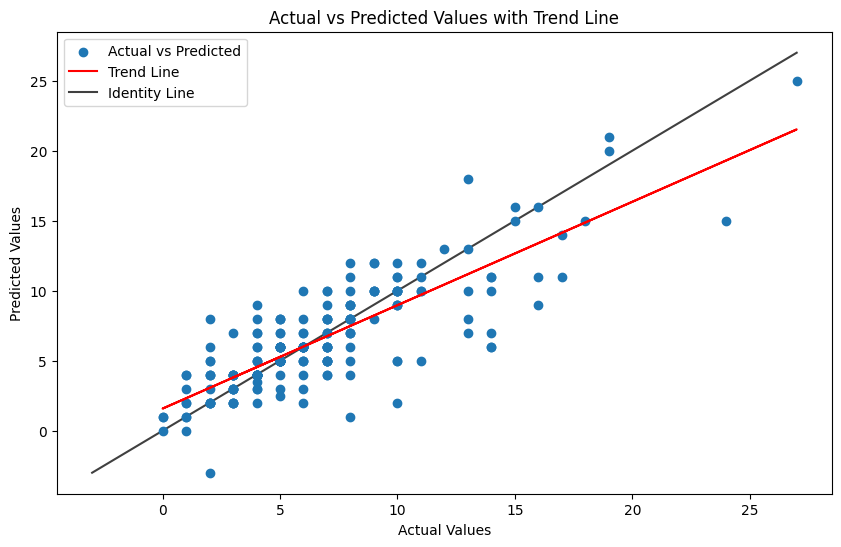

In [20]:
import numpy as np
import matplotlib.pyplot as plt

# Scatter plot of actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(Y_test, Y_pred, label='Actual vs Predicted')
plt.title('Actual vs Predicted Values with Trend Line')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

# Add a trend line (line of best fit)
z = np.polyfit(Y_test, Y_pred, 1)
p = np.poly1d(z)
plt.plot(Y_test, p(Y_test), color='red', label='Trend Line')

# Add identity line
lims = [
    np.min([Y_test.min(), Y_pred.min()]),
    np.max([Y_test.max(), Y_pred.max()])
]
plt.plot(lims, lims, 'k-', alpha=0.75, zorder=0, label='Identity Line')

plt.legend()
plt.show()


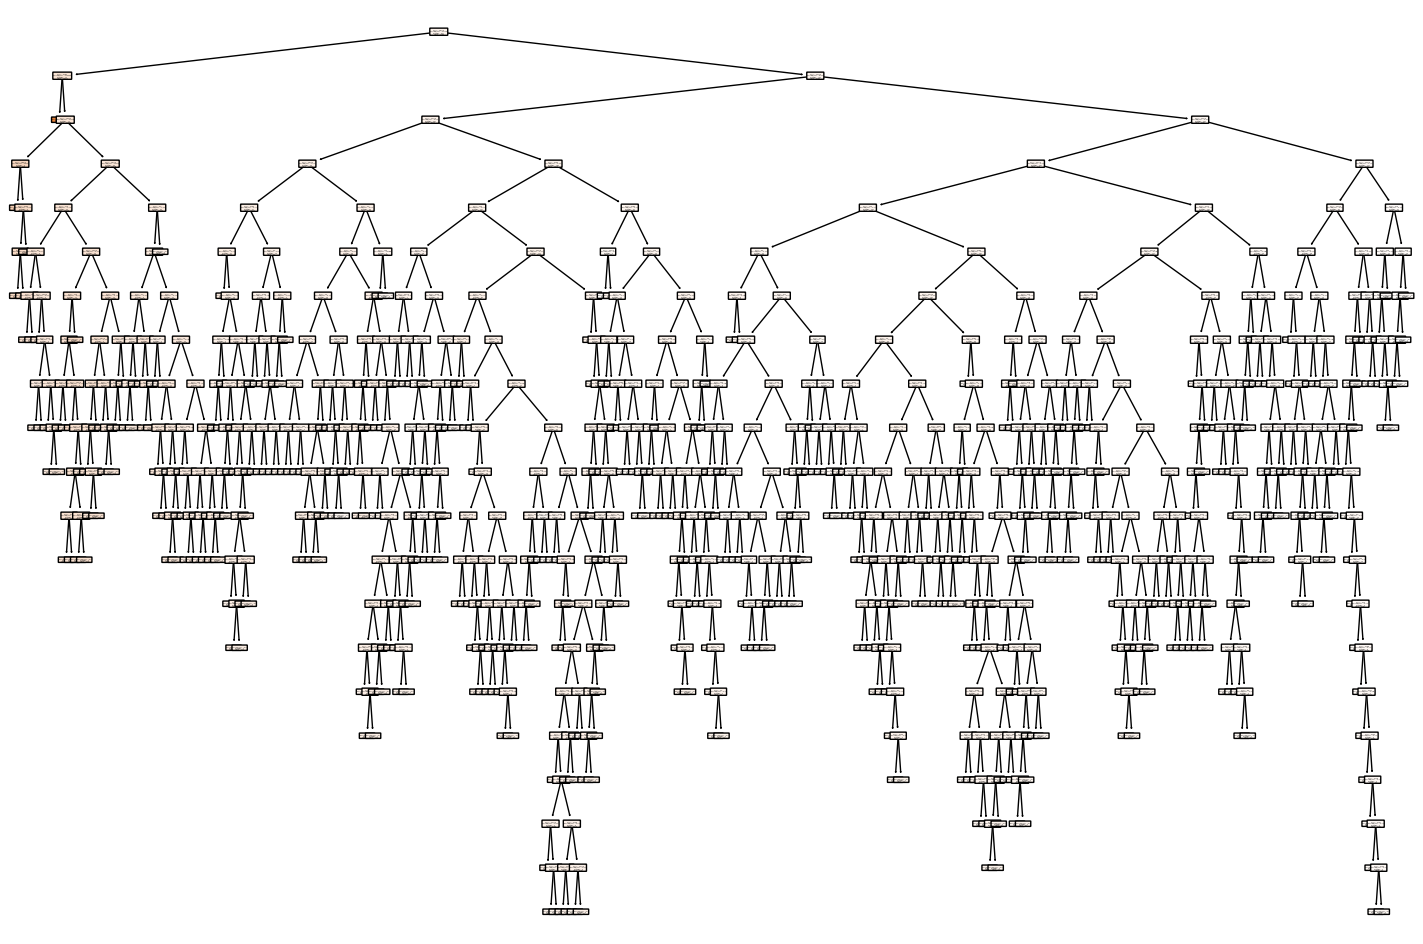

In [20]:
# Visualize the decision tree

plt.figure(figsize=(18, 12))
plot_tree(regressor, filled=True, rounded=True)
plt.show()

In [22]:
# Assume 'new_data' is a DataFrame with the same structure as your training data
# Replace the values in 'new_data' with the actual values you want to predict for

new_data = pd.DataFrame({
    'Encoded_Industry': "Fintech",  # Replace with the actual value for 'Encoded_Industry'
    'Encoded_Country': "Indonesia",   # Replace with the actual value for 'Encoded_Country'
    'Year Founded': 2020,      # Replace with the actual value for 'Year Founded'
    'Funding_Numeric ($B)': 2   # Replace with the actual value for 'Funding_Numeric'
}, index=[0])

# Encode categorical variables
new_data['Encoded_Industry'] = industry_le.transform(new_data['Encoded_Industry'])
new_data['Encoded_Country'] = country_le.transform(new_data['Encoded_Country'])

# Use the trained model to make predictions
predicted_years_to_unicorn = regressor.predict(new_data)

print("Predicted Years to Unicorn:", predicted_years_to_unicorn)


Predicted Years to Unicorn: [1.]
